# 1) 랜덤 포레스트_예측
문제) 콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를
이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라.

0. train_test_split 함수를 이용하여 train:test로 데이터 분할. 분할된 train 데이터를 재 분할하여 validation 데이터로 사용

1. train 데이터: 모델 훈련

2. validation 데이터: 최적의 parameter 찾기(과정의 [연습/실습]에서 test 데이터 역할)

3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# plt.rc('font', family = 'NanumGothic')

In [2]:
path = '/home/piai/Downloads/big_data/'
dataset = pd.read_csv(path + 'Concrete.csv')

In [3]:
dataset

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
# train & validation & test 데이터로 분할

In [5]:
Y = dataset['CONCRETE_COMPRESSIVE_STRENGTH']
X = dataset.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X,Y,test_size = 0.3, random_state=1234)
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(X,Y,test_size = 0.3, random_state=1234)

In [6]:
print(df_train_x.shape)
print(df_train_y.shape)
print(df_valid_x.shape)
print(df_valid_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(721, 8)
(721,)
(309, 8)
(309,)
(309, 8)
(309,)


In [7]:
# train 데이터로 모델 훈련하기

In [8]:
tree_uncustomized = RandomForestRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(tree_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set:0.983
Score on test set:0.909


In [9]:
# 디폴트 상태에서의 랜덤포레스트 모델, 트레이닝 스코어와 밸리데이션 스코어 모두 좋은 점수를 기록하고 있다.
# 하지만 학습을 목적으로 파라미터 튜닝을 통한 학습을 진행해보도록 한다.

In [10]:
# parameter1 - n_estimators의 변화에 따른
train_score_n, valid_score_n = [], []

para_n_tree = [n_tree * 10 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score_n.append(rf.score(df_train_x, df_train_y))
    valid_score_n.append(rf.score(df_valid_x, df_valid_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score_n
df_score_n['ValidScore'] = valid_score_n

In [11]:
df_score_n

,n_estimators,TrainScore,ValidScore
0,10,0.975004,0.890007
1,20,0.979356,0.898475
2,30,0.981293,0.905445
3,40,0.981903,0.903808
4,50,0.982725,0.907614
5,60,0.982811,0.908502
6,70,0.982981,0.908945
7,80,0.983044,0.907422
8,90,0.982932,0.907790
9,100,0.983129,0.909238


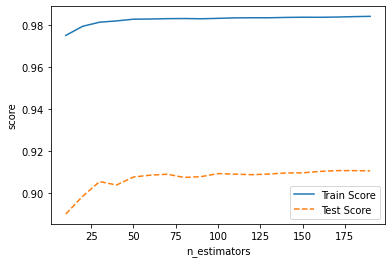

In [12]:
df_score_n.round(3)
plt.plot(para_n_tree, train_score_n, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, valid_score_n, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

In [13]:
# n_estimator를 180으로 선택한다.

In [14]:
#모델 파라미터 조정 - min_samples_leaf
train_score_leaf, valid_score_leaf = [], []

para_leaf = [n_leaf * 2 for n_leaf in range(1,70)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 180,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score_leaf.append(rf.score(df_train_x, df_train_y))
    valid_score_leaf.append(rf.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSampleLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score_leaf
df_score_leaf['ValidScore'] = valid_score_leaf

In [15]:
df_score_leaf

,MinSampleLeaf,TrainScore,ValidScore
0,2,0.971794,0.906717
1,4,0.946794,0.894382
2,6,0.924840,0.877216
3,8,0.906899,0.864588
4,10,0.892793,0.851551
...,...,...,...
64,130,0.457623,0.469572
65,132,0.458017,0.470557
66,134,0.456140,0.468865
67,136,0.455509,0.466624


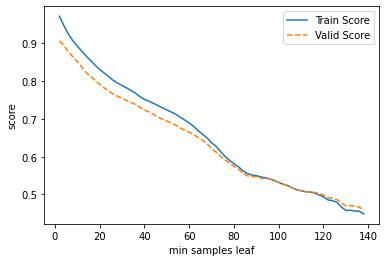

In [16]:
df_score_n.round(3)
plt.plot(para_leaf, train_score_leaf, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, valid_score_leaf, linestyle = '--', label = 'Valid Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [17]:
# min_samples_leaf를 2로 선택한다. 높아질수록 score가 낮아진다.

In [18]:
#모델 파라미터 조정 - min_samples_split
train_score_split, valid_score_split = [], []

para_split = [split * 2 for split in range(1,20)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 180,
                              min_samples_leaf = 2, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score_split.append(rf.score(df_train_x, df_train_y))
    valid_score_split.append(rf.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesDepth'] = para_split
df_score_split['TrainScore'] = train_score_split
df_score_split['ValidScore'] = valid_score_split

In [19]:
df_score_split

,MinSamplesDepth,TrainScore,ValidScore
0,2,0.971794,0.906717
1,4,0.971794,0.906717
2,6,0.966241,0.904051
3,8,0.959759,0.900290
4,10,0.952735,0.895014
5,12,0.945233,0.889657
6,14,0.938073,0.884835
7,16,0.930839,0.878916
8,18,0.924354,0.874007
9,20,0.918290,0.868182


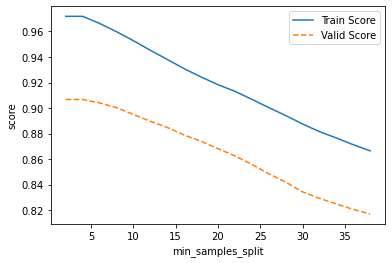

In [20]:
df_score_n.round(3)
plt.plot(para_split, train_score_split, linestyle = '-', label = 'Train Score')
plt.plot(para_split, valid_score_split, linestyle = '--', label = 'Valid Score')
plt.ylabel('score'); plt.xlabel('min_samples_split')
plt.legend()

In [21]:
# split을 5로 설정한다.

In [22]:
#모델 파라미터 조정 - max_depth
train_score_depth, valid_score_depth = [], []

para_depth = [depth * 2 for depth in range(1,20)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 180,
                              min_samples_leaf = 2, min_samples_split = 5 ,max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score_depth.append(rf.score(df_train_x, df_train_y))
    valid_score_depth.append(rf.score(df_valid_x, df_valid_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesDepth'] = para_depth
df_score_depth['TrainScore'] = train_score_depth
df_score_depth['ValidScore'] = valid_score_depth

In [23]:
df_score_depth

,MinSamplesDepth,TrainScore,ValidScore
0,2,0.605390,0.599454
1,4,0.820486,0.785669
2,6,0.920516,0.875476
3,8,0.955687,0.896746
4,10,0.966609,0.902949
5,12,0.968900,0.904703
6,14,0.969245,0.905088
7,16,0.969278,0.905048
8,18,0.969277,0.905008
9,20,0.969277,0.905008


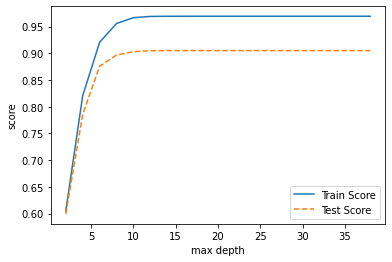

In [24]:
df_score_n.round(3)
plt.plot(para_depth, train_score_depth, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, valid_score_depth, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('max depth')
plt.legend()

In [25]:
# depth를 14로 선택한다.

# 결론 도출
rf_final = RandomForestRegressor(random_state=1234, n_estimators=180, min_samples_leaf=2, min_samples_split=5, max_depth=14)

rf_final.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on valid set:{:.3f}'.format(rf_final.score(df_valid_x, df_valid_y)))

Score on training set:0.969
Score on valid set:0.905


In [26]:
rf_final

RandomForestRegressor(max_depth=14, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=180, random_state=1234)

In [27]:
# 180개의 트리 중 임의의 3개를 확인한다.

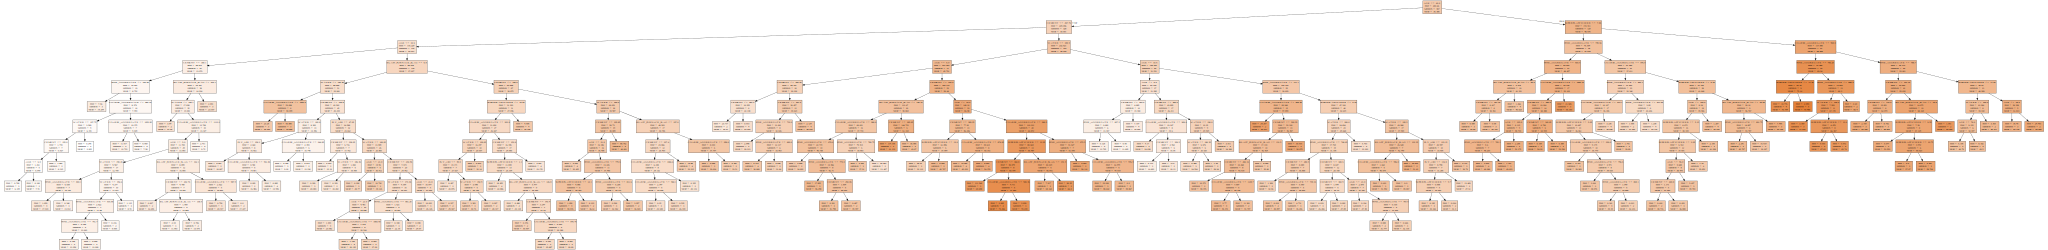

In [28]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file = 'rf_final_0.dot',
                feature_names = v_feature_name, impurity = True, filled = True)
with open('rf_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

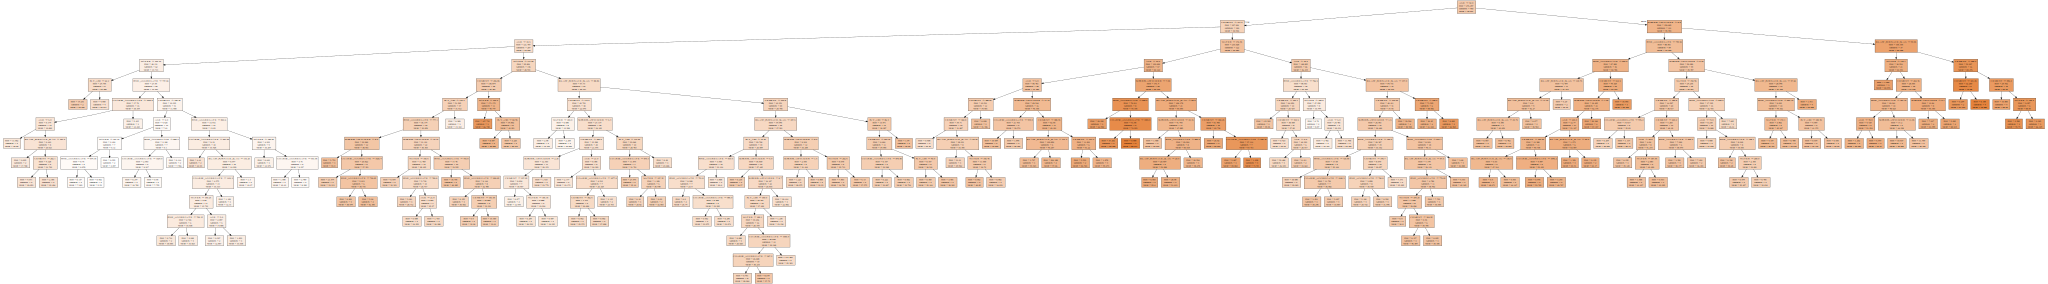

In [29]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[1], out_file = 'rf_final_1.dot',
                feature_names = v_feature_name, impurity = True, filled = True)
with open('rf_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

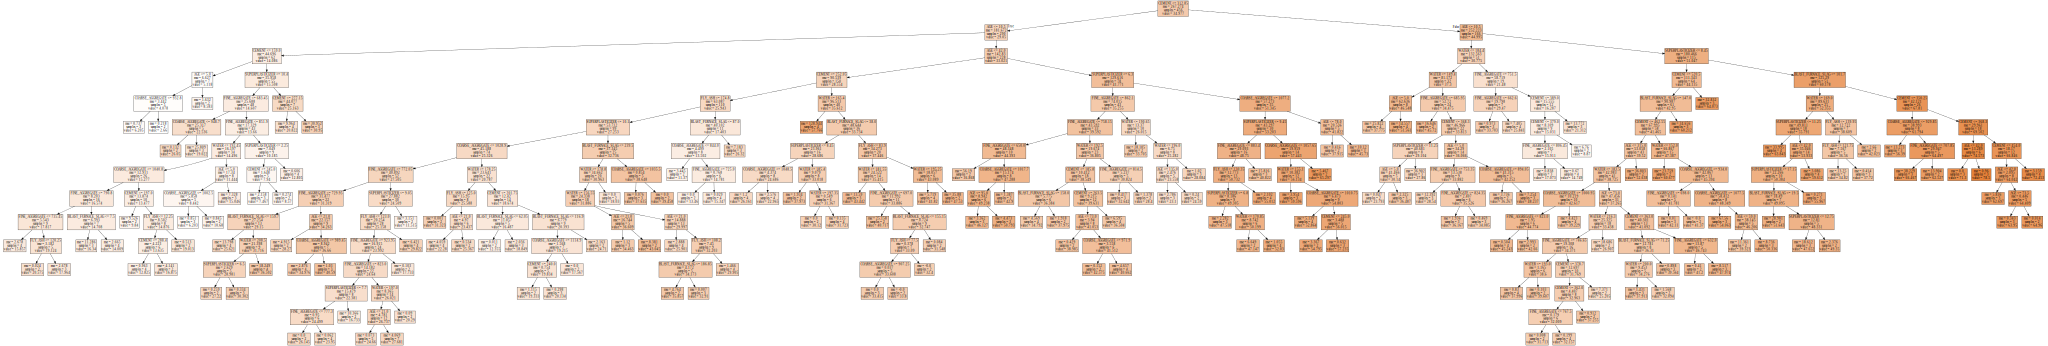

In [30]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[10], out_file = 'rf_final_2.dot',
                feature_names = v_feature_name, impurity = True, filled = True)
with open('rf_final_2.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [31]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.352
0,CEMENT,0.303
3,WATER,0.111
4,SUPERPLASTICIZER,0.085
1,BLAST_FURNACE_SLAG,0.062
6,FINE_AGGREGATE,0.042
5,COARSE_AGGREGATE,0.029
2,FLY_ASH,0.016


Text(0, 0.5, 'Variables')

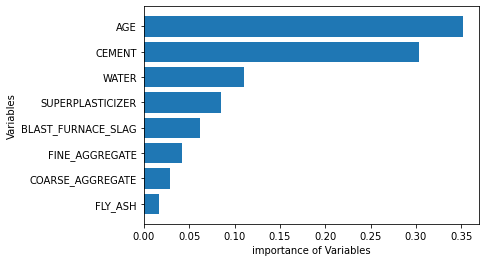

In [32]:
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('importance of Variables')
plt.ylabel('Variables')

In [33]:
# 랜덤포레스트 결과 중요 변수는 다음과 같다. AGE, CEMENT가 중요도가 각각 0.35, 0.3으로 높은 값을 가졌고 나머지는 0.11, 0.85와 같은 중요도를 가졌다.

# mse, mae 비교하기

In [36]:
pred =  rf_final.predict(df_test_x)
mse = mean_squared_error(df_test_y, pred)
mae = mean_absolute_error(df_test_y, pred)
print(mse)
print(mae)

24.729437067442028
3.657532668303905


# 2) 그래디언트 부스팅_예측

콘크리트 강도를 예측하는 그래디언트 부스팅 모델을 만들고 predict method를
이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라.

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
df_concrete = pd.read_csv(path + 'Concrete.csv')

In [39]:
df_concrete.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [40]:
Y = df_concrete['CEMENT']
X = df_concrete.drop('CEMENT', axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X,Y,test_size = 0.3, random_state=1234)
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(X,Y,test_size = 0.3, random_state=1234)

In [41]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.972
Score on training set:0.943


In [42]:
#모델 파라미터 조정 - n_estimators
train_score_n, valid_score_n = [], []

para_n_tree = [n_tree * 10 for n_tree in range(1,15)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score_n.append(gb.score(df_train_x, df_train_y))
    valid_score_n.append(gb.score(df_valid_x, df_valid_y))
    
df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score_n
df_score_n['validScore'] = valid_score_n

In [43]:
df_score_n

,Estimators,TrainScore,validScore
0,10,0.596194,0.556182
1,20,0.798791,0.763678
2,30,0.879377,0.848817
3,40,0.915167,0.884126
4,50,0.936727,0.904078
5,60,0.949249,0.918192
6,70,0.959080,0.928802
7,80,0.964805,0.934938
8,90,0.968816,0.938921
9,100,0.972142,0.942580


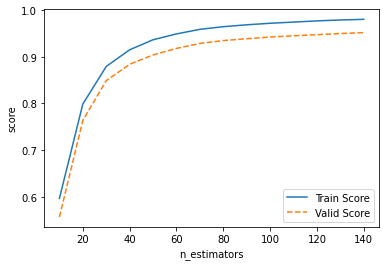

In [44]:
df_score_n.round(3)
plt.plot(para_n_tree, train_score_n, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, valid_score_n, linestyle = '--', label = 'Valid Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

In [45]:
# n_estimators를 70으로 선택한다. 트리수 증가에 따라 모델의 설명력은 지속적으로 향상되나, 테스트 데이터의 성능변화가 더디게 증가하므로 70을 선택한다.

In [46]:
#모델 파라미터 조정 - min_samples_leaf
train_score_leaf, valid_score_leaf = [], []

para_leaf = [n_leaf * 10 for n_leaf in range(1,15)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 70,
                                  min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score_leaf.append(gb.score(df_train_x, df_train_y))
    valid_score_leaf.append(gb.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['Estimators'] = para_n_tree
df_score_leaf['TrainScore'] = train_score_leaf
df_score_leaf['validScore'] = valid_score_leaf

In [47]:
df_score_leaf

,Estimators,TrainScore,validScore
0,10,0.955639,0.920243
1,20,0.953045,0.926331
2,30,0.946853,0.922147
3,40,0.942577,0.922716
4,50,0.938886,0.917141
5,60,0.932912,0.915748
6,70,0.926026,0.908917
7,80,0.909126,0.894382
8,90,0.897912,0.894143
9,100,0.885341,0.884548


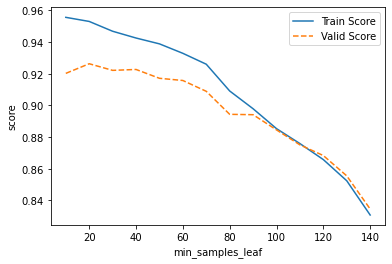

In [48]:
df_score_n.round(3)
plt.plot(para_leaf, train_score_leaf, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, valid_score_leaf, linestyle = '--', label = 'Valid Score')
plt.ylabel('score'); plt.xlabel('min_samples_leaf')
plt.legend()

In [49]:
# 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소한다.
# test데이터의 성능 변화를 고려하여 60을 선택한다.

In [50]:
#모델 파라미터 조정
train_score_split, valid_score_split = [], []

para_split = [n_split * 2 for n_split in range(1,81)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 70,
                                  min_samples_leaf = 60,
                                  min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score_split.append(gb.score(df_train_x, df_train_y))
    valid_score_split.append(gb.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score_split
df_score_split['ValidScore'] = valid_score_split

In [51]:
df_score_split[50:70]

,MinSamplesSplit,TrainScore,ValidScore
50,102,0.932912,0.915748
51,104,0.932912,0.915748
52,106,0.932912,0.915748
53,108,0.932912,0.915748
54,110,0.932912,0.915748
55,112,0.932912,0.915748
56,114,0.932912,0.915748
57,116,0.932912,0.915748
58,118,0.932912,0.915748
59,120,0.932912,0.915748


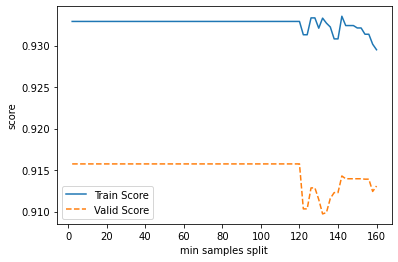

In [52]:
df_score_n.round(3)
plt.plot(para_split, train_score_split, linestyle = '-', label = 'Train Score')
plt.plot(para_split, valid_score_split, linestyle = '--', label = 'Valid Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [53]:
# split 파라미터는 120보다 적은 영역에서는 변화가 없다.
# 이후 분리노드 최소 자료 수 증가에 따라 모델의 설명력은 감소한다.
# 계산속도를 고려하여 30으로 설정하도록 한다.

In [54]:
#모델 파라미터 조정
train_score_depth, valid_score_depth = [], []

para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 70,
                                  min_samples_leaf = 60,
                                  min_samples_split = 30,
                                  max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score_depth.append(gb.score(df_train_x, df_train_y))
    valid_score_depth.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score_depth
df_score_depth['ValidScore'] = valid_score_depth

In [55]:
df_score_depth

,Depth,TrainScore,ValidScore
0,1,0.664199,0.659484
1,2,0.881781,0.872995
2,3,0.932912,0.915748
3,4,0.941015,0.919263
4,5,0.944946,0.919162
5,6,0.949051,0.924951
6,7,0.947417,0.924321
7,8,0.948850,0.926721
8,9,0.948850,0.926721
9,10,0.948850,0.926721


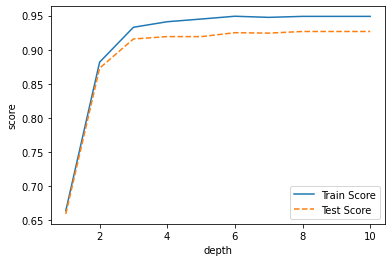

In [56]:
df_score_n.round(3)
plt.plot(para_depth, train_score_depth, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, valid_score_depth, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('depth')
plt.legend()

In [57]:
# 최대 깊이 증가에 따라 모델의 설명력은 증가한다.
# 4를 선택한다. 테스트 성능 변화를 고려한 선택이다.

In [58]:
#모델 파라미터 조정
train_score_l, valid_score_l = [], []

para_l = [l*0.1  for l in range(1,20)]

for v_learning_rate in para_l:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 70,
                                  min_samples_leaf = 60,
                                  min_samples_split = 30,
                                  max_depth = 4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score_l.append(gb.score(df_train_x, df_train_y))
    valid_score_l.append(gb.score(df_valid_x, df_valid_y))
    
df_score_l = pd.DataFrame()
df_score_l['Depth'] = para_l
df_score_l['TrainScore'] = train_score_l
df_score_l['ValidScore'] = valid_score_l

In [59]:
df_score_l

,Depth,TrainScore,ValidScore
0,0.1,0.941015,0.919263
1,0.2,0.964424,0.937904
2,0.3,0.969769,0.942989
3,0.4,0.976418,0.948997
4,0.5,0.979559,0.949806
5,0.6,0.978120,0.942527
6,0.7,0.979081,0.941522
7,0.8,0.979797,0.948550
8,0.9,0.980192,0.932121
9,1.0,0.979651,0.922783


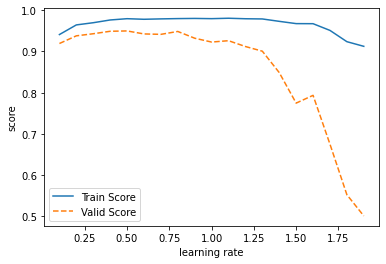

In [60]:
df_score_n.round(3)
plt.plot(para_l, train_score_l, linestyle = '-', label = 'Train Score')
plt.plot(para_l, valid_score_l, linestyle = '--', label = 'Valid Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

In [61]:
# 0.75를 학습률로 선택한다.
# 학습률 증가에 따라 모델의 설명력은 증가하다가 서서히 감소하는데, 학습률은 서서히 감소하다가 확 감소하는 경향을 보인다.

In [62]:
gb_final = GradientBoostingRegressor(random_state=1234,
                                     n_estimators=30, min_samples_leaf=70,
                                     min_samples_split=60, max_depth=4, 
                                     learning_rate = 0.75)

gb_final.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.956
Score on test set:0.922


In [63]:
# 최적의 파라미터를 찾았다. 처음 디폴트 상태의 그래디언트 부스트에 비해 트레이닝과 테스트 스코어가 각각 0.2정도 낮아진 것을 알 수 있다.
# 그러나 파라미터 튜닝 과정을 통해 학습한 최적의 모델이므로, 스코어가 낮아졌음에도 불구하고 현재의 모델을 예측에 사용하도록 한다.

In [64]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
7,CONCRETE_COMPRESSIVE_STRENGTH,0.354
0,BLAST_FURNACE_SLAG,0.227
1,FLY_ASH,0.204
5,FINE_AGGREGATE,0.075
6,AGE,0.059
4,COARSE_AGGREGATE,0.059
2,WATER,0.020
3,SUPERPLASTICIZER,0.001


Text(0, 0.5, 'Variables')

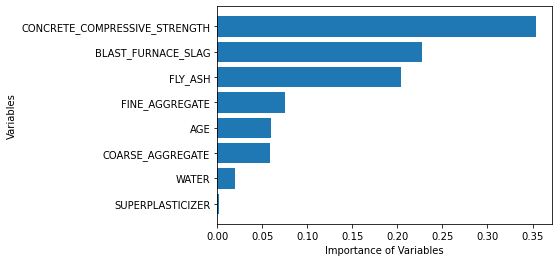

In [65]:
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance of Variables')
plt.ylabel('Variables')

In [66]:
# 주요 변수를 살펴본 결과, CONCRETE_COMPRESSIVE_STRENGTH, BLAST_FURNACE_SLAG, FLY_ASH가 각각 0.354, 0.227, 0204의 중요도를 가졌다.
# 반면, SUPERPLASTICIZER는 0.001로 낮은 중요도를 가졌다.

# mse, mae 비교하기

In [67]:
pred =  gb_final.predict(df_test_x)
mse = mean_squared_error(df_test_y, pred)
mae = mean_absolute_error(df_test_y, pred)
print(mse)
print(mae)

884.8316542325281
22.039598192410143


# 3) 주성분 회귀분석
### 데이터 표준화 이후, 주성분 분석을 실시하여 2차원(1 vs 2 주성분, 1 vs 3 주성분, …) 산점도를 그려라.(목표변수로 색 구분), + 주성분 naming

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [69]:
path = '/home/piai/Downloads/big_data/'
df_raw = pd.read_csv(path+'유방암.csv')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
# 설명변수를 이용해서 주성분 분석을 하므로 독립변수와 설명변수를 나누어준다.
df_raw_x = df_raw.drop('diagnosis', axis=1)
df_raw_y = df_raw['diagnosis']
df_raw_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [71]:
#스텝2
#산점도행렬을 통해 선형관계를 확인한다.
# sns.pairplot(df_raw_x)

In [72]:
#스텝3 - 데이터 확인 및 스케일링
# 모든 주성분은 다른 주성분들과 상관관계가 없다는 제약(직교)하에 가장 큰 분산을 가진다. - PCA방향은 데이터 스케일에 매우 민감하다. 따라서, 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리해야한다.

In [73]:
df_raw_x.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


In [74]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

# 변환된 데이터 및 형태 확인
print('Scaled Data:\n {}'.format(nd_scaled[:5].round(3)))
print('Shape:\w {}'.format(nd_scaled.shape))

Scaled Data:
 [[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e-

In [75]:
# 데이터프레임으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097,-2.073,1.270,0.984,1.568,3.284,2.653,2.532,2.218,2.256,...,1.887,-1.359,2.304,2.001,1.308,2.617,2.110,2.296,2.751,1.937
1,1.830,-0.354,1.686,1.909,-0.827,-0.487,-0.024,0.548,0.001,-0.869,...,1.806,-0.369,1.535,1.890,-0.376,-0.430,-0.147,1.087,-0.244,0.281
2,1.580,0.456,1.567,1.559,0.942,1.053,1.363,2.037,0.940,-0.398,...,1.512,-0.024,1.347,1.456,0.527,1.083,0.855,1.955,1.152,0.201
3,-0.769,0.254,-0.593,-0.764,3.284,3.403,1.916,1.452,2.867,4.911,...,-0.281,0.134,-0.250,-0.550,3.394,3.893,1.990,2.176,6.046,4.935
4,1.750,-1.152,1.777,1.826,0.280,0.539,1.371,1.428,-0.010,-0.562,...,1.299,-1.467,1.339,1.221,0.221,-0.313,0.613,0.729,-0.868,-0.397


In [76]:
# 변환된 데이터의 요약통계량을 살펴본다.
df_scaled.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


In [77]:
# 스텝4 주성분 분석
# 30개의 주성분을 생성한다.
pca = PCA(n_components = 5)
nd_pca = pca.fit_transform(df_scaled)

print('PCA Data: \n{}'.format(nd_pca[:5]))
print('Shape:\n{}'.format(nd_pca.shape))

PCA Data: 
[[ 9.19283683  1.94858306 -1.12316608  3.63373119 -1.19511072]
 [ 2.3878018  -3.76817172 -0.52929265  1.11826391  0.62177579]
 [ 5.73389628 -1.07517382 -0.55174774  0.91208245 -0.17708593]
 [ 7.1229532  10.27558912 -3.23278973  0.15254697 -2.96087769]
 [ 3.93530207 -1.94807157  1.38976671  2.94063943  0.54674737]]
Shape:
(569, 5)


In [78]:
# 주성분 점수를 저장하고 확인하도록 한다. # 주성분의 이름은 PC로 한다.
cols = ['PC' + str(i) for i in range(5)]
df_pca = pd.DataFrame(nd_pca, columns=cols)
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC0,PC1,PC2,PC3,PC4
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.616665,2.109526,2.296076,2.750622,1.937015,9.192837,1.948583,-1.123166,3.633731,-1.195111
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.430444,-0.146749,1.087084,-0.243890,0.281190,2.387802,-3.768172,-0.529293,1.118264,0.621776
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.082932,0.854974,1.955000,1.152255,0.201391,5.733896,-1.075174,-0.551748,0.912082,-0.177086
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,3.893397,1.989588,2.175786,6.046041,4.935010,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-0.313395,0.613179,0.729259,-0.868353,-0.397100,3.935302,-1.948072,1.389767,2.940639,0.546747


In [79]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324])

In [80]:
#주성분 분석 및 결과: 주성분 번호, 고유값, 고유값 비율
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,6)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847


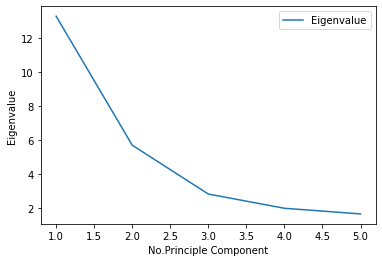

In [81]:
#주성분 분석 및 결과: Scree plot 확인 및 주성분 개수 결정
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'],
        label = 'Eigenvalue')

plt.ylabel('Eigenvalue')
plt.xlabel('No.Principle Component')
plt.legend(loc = 'best')

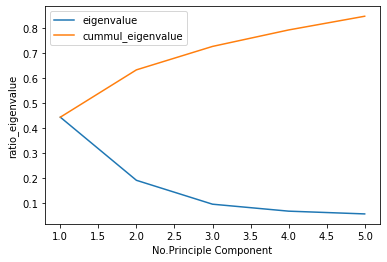

In [82]:
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['EigenValueRatio'], label = 'eigenvalue')
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['CumEigenValueRatio'], label = 'cummul_eigenvalue')
plt.ylabel('ratio_eigenvalue')
plt.xlabel('No.Principle Component')
plt.legend(loc = 'best')

In [83]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1,
                                                columns = cols)], axis=1)
df_eigenvector.round(3).head()

,Feature,PC0,PC1,PC2,PC3,PC4
0,mean radius,-0.219,0.234,0.009,-0.041,-0.038
1,mean texture,-0.104,0.060,-0.065,0.603,0.049
2,mean perimeter,-0.228,0.215,0.009,-0.042,-0.037
3,mean area,-0.221,0.231,-0.029,-0.053,-0.010
4,mean smoothness,-0.143,-0.186,0.104,-0.159,0.365


위 그래프의 결과로 5개의 주성분을 선택한다. 선택된 5개의 주성분은 약 85%의 설명력을 가진다. 스크리 플랏의 경우, 5번째 주성분은 고유값이 2정도를 가진다.

In [84]:
# sns.pairplot(df_pca)

In [85]:
df_pca.corr().round(3)

,PC0,PC1,PC2,PC3,PC4
PC0,1.0,-0.0,0.0,0.0,-0.0
PC1,-0.0,1.0,0.0,0.0,-0.0
PC2,0.0,0.0,1.0,0.0,0.0
PC3,0.0,0.0,0.0,1.0,0.0
PC4,-0.0,-0.0,0.0,0.0,1.0


In [86]:
# 주성분 상관/회귀분석: 회귀분석
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          6.05e-153
Time:                        02:56:19   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [87]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          6.05e-153
Time:                        02:56:20   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [88]:
# 다중선형 주성분 회귀분석. 5개의 주성분을 활용해서 회귀모델을 생성한다.

x_var = ['PC0','PC1','PC2','PC3','PC4']
# 선택된 주성분 점수 데이터에 절편(const)컬럼을 추가한다.
df_pca_const = sm.add_constant(df_pca[x_var])
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     270.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          5.84e-147
Time:                        02:56:32   Log-Likelihood:                -45.826
No. Observations:                 569   AIC:                             103.7
Df Residuals:                     563   BIC:                             129.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.708      0.0

In [89]:
# F검정 결과, P값이 5.84e-147로 유의수준 0.05에서 귀무가설을 기각한다. 즉, 주어진 모델은 유의하다고 할 수 있다.
# 현재 모델의 설명력은 0.7로 전체의 약 70%를 설명한다.
# 주성분 회귀분석의 회귀계수는 모두 유의하다.